In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_fish = pd.read_csv(r'C:\Users\Owner\Downloads\Machine Learning\Regression\Fish.csv')

In [5]:
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
np.sum(df_fish.isnull())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


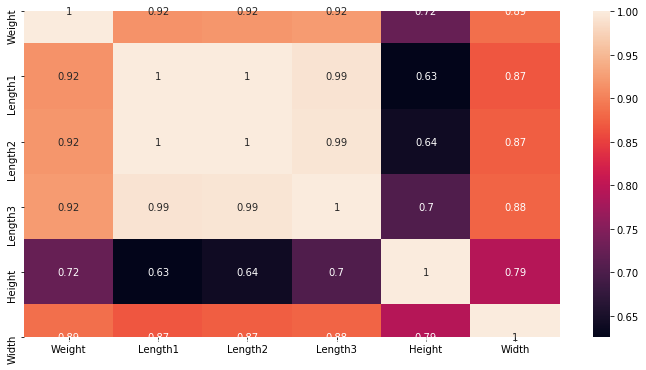

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df_fish.corr(),annot=True)
plt.show()

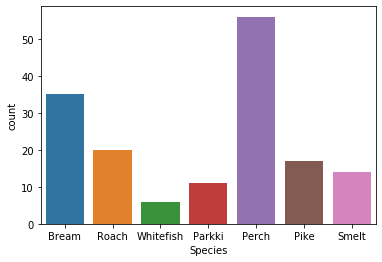

In [22]:
sns.countplot(x=df_fish['Species']);

Text(0, 0.5, 'Lengths')

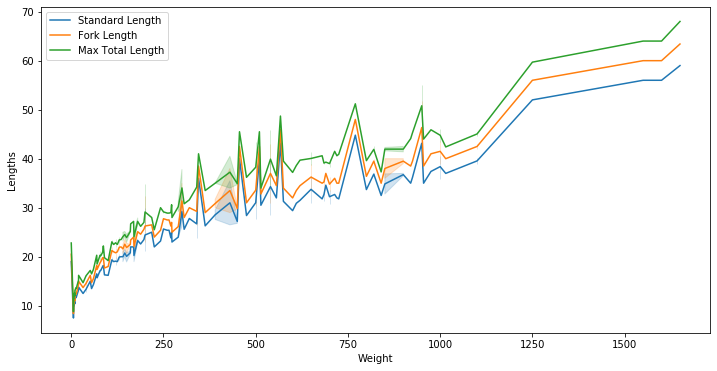

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_fish['Weight'],y=df_fish['Length1'],label ='Standard Length')
sns.lineplot(x=df_fish['Weight'],y=df_fish['Length2'],label ='Fork Length')
sns.lineplot(x=df_fish['Weight'],y=df_fish['Length3'],label ='Max Total Length')
plt.ylabel('Lengths')

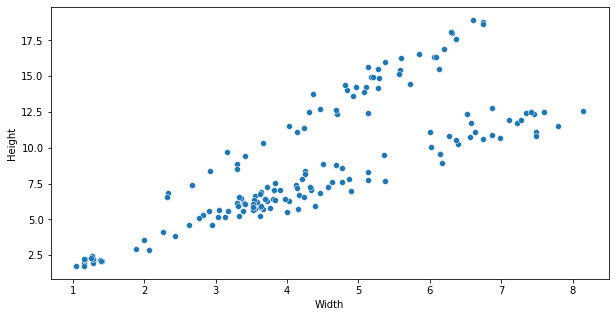

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_fish['Width'],y=df_fish['Height'])
plt.show()

In [27]:
df_fish.groupby(['Species']).agg({'Weight':['mean','std','count','max','min']})

Weight                                 
                 mean         std count     max    min
Species                                               
Bream      617.828571  209.205709    35  1000.0  242.0
Parkki     154.818182   78.755086    11   300.0   55.0
Perch      382.239286  347.617717    56  1100.0    5.9
Pike       718.705882  494.140765    17  1650.0  200.0
Roach      152.050000   88.828916    20   390.0    0.0
Smelt       11.178571    4.131526    14    19.9    6.7
Whitefish  531.000000  309.602972     6  1000.0  270.0

In [28]:
df_3fish = df_fish[df_fish['Species'].isin(['Bream','Perch','Whitefish'])]

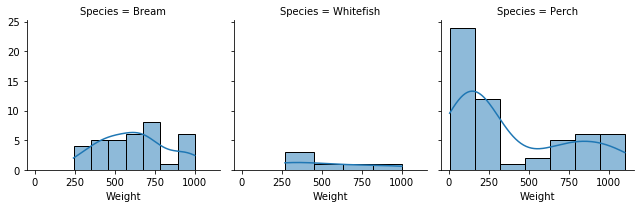

In [30]:
d = sns.FacetGrid(data=df_3fish,col='Species')
d.map(sns.histplot,'Weight',kde=True)
plt.show()

In [31]:
df_fish[df_fish['Species'].isin(['Whitefish'])]

,Species,Weight,Length1,Length2,Length3,Height,Width
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
57,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
58,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250


In [32]:
df_3fish[df_3fish['Weight']> 250]

,Species,Weight,Length1,Length2,Length3,Height,Width
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
...,...,...,...,...,...,...,...
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
124,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
126,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420


In [33]:
df_fish.groupby(['Species']).mean()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [34]:
df_fish.groupby(['Species']).agg({'Weight':['count','max','min']})

Weight               
           count     max    min
Species                        
Bream         35  1000.0  242.0
Parkki        11   300.0   55.0
Perch         56  1100.0    5.9
Pike          17  1650.0  200.0
Roach         20   390.0    0.0
Smelt         14    19.9    6.7
Whitefish      6  1000.0  270.0

In [35]:
df_fish[df_fish['Species'] == 'Roach']

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478


In [36]:
df_fish =  df_fish.drop([40],axis=0);

In [37]:
df_fish.loc[39:41,:]

,Species,Weight,Length1,Length2,Length3,Height,Width
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957


In [38]:
df_dummy = pd.get_dummies(df_fish['Species'],drop_first=True);

In [39]:
df_fish = df_fish.drop('Species',axis=1);

In [40]:
df_final = pd.concat([df_fish,df_dummy],axis=1)

In [41]:
df_final.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [42]:
X = df_final.drop('Weight',axis=1)
y = df_final['Weight'];

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 ,random_state= 42)

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(X_train)

StandardScaler()

In [47]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = linear_model.predict(X_test)

In [51]:
linear_model.coef_

array([-3.93845689e+02,  6.12346915e+02,  2.33388364e+02, -4.83905139e+01,
        5.56535028e+00,  2.85088244e+01, -4.57942023e-01, -1.07157452e+02,
       -6.98143721e+00,  6.81780850e+01,  7.92120446e+00])

In [52]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error;

In [53]:
Mae = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

In [54]:
print(Mae)
print(MSE)
print(RMSE)
print(r2)

68.69758140791991
8524.898581665515
92.33037735039056
0.9306997867463993


In [55]:
residuals = y_test - y_pred

Text(0.5, 0, 'predicted Weight')

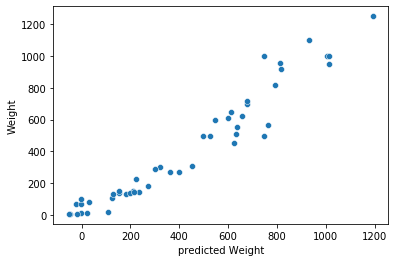

In [56]:
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel('predicted Weight')

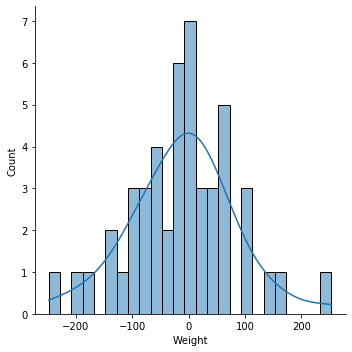

In [57]:
sns.displot(residuals,bins=25,kde=True)

In [59]:
import statsmodels.api as sm

# adding the constant term
x = sm.add_constant(X_train)
y = y_train
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.19e-51
Time:                        12:58:38   Log-Likelihood:                -656.46
No. Observations:                 110   AIC:                             1337.
Df Residuals:                      98   BIC:                             1369.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        394.3691      9.549     41.301      0.0

OLS for Height and Weight

In [89]:
X = df_final['Height']
y = df_final['Weight']

In [90]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 ,random_state= 42)

In [92]:
import statsmodels.api as sm

# adding the constant term
x = sm.add_constant(X_train)
y = y_train
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     99.76
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           4.96e-17
Time:                        13:23:52   Log-Likelihood:                -767.23
No. Observations:                 110   AIC:                             1538.
Df Residuals:                     108   BIC:                             1544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -152.2682     60.127     -2.532      0.0

C:\Users\Owner\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


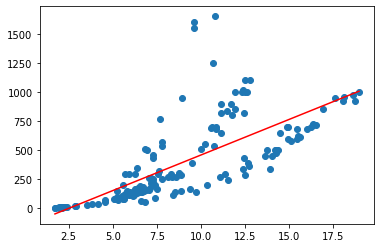

In [98]:
# Making predictions
X = df_final['Height']
y = df_final['Weight']
Y_pred = 61.1261*X  -152.2682

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

GD for Height and Weight

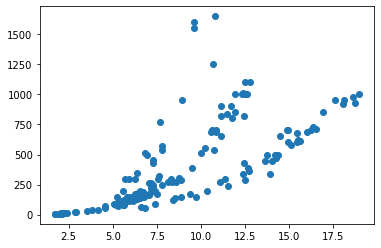

In [78]:
X = df_final['Height']
Y = df_final['Weight']

plt.scatter(X, Y)
plt.show()

In [79]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

47.56719359389447 -0.9521759891603213


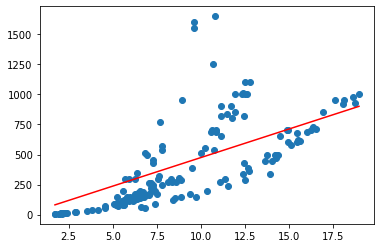

In [80]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()